In [1]:
%config Completer.use_jedi = False
import sys
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")
from pde_solvers.cn import *
import numpy as np
import matplotlib.pyplot as plt

In [9]:
model = RD_1D_1st_Order(Ds=[0.001, 0.1], N=1000, T=200, L=1.0, Ix=100,
                       #boundary_condition=Neumann_Boundary_1D
                       #boundary_condition=Periodic_Boundary_1D
                       boundary_condition=Neumann_Boundary_1D
                       )

In [10]:
k0 = 0.067
def kinetics(u, v):
    value = v*(k0 + (u*u)/(1. + u*u)) - u
    return (value, -value)


In [11]:
x_grid = np.array([j*model.Δx for j in range(model.Ix)])
t_grid = np.array([n*model.Δt for n in range(model.T)])
total_protein = 2.26
no_high = 10
U = np.array([0.1 for i in range(no_high,model.Ix)] + [2. for i in range(0,no_high)])
V = np.array([(total_protein-model.Δx*sum(U))/(model.Ix*model.Δx) for i in range(0,model.Ix)])

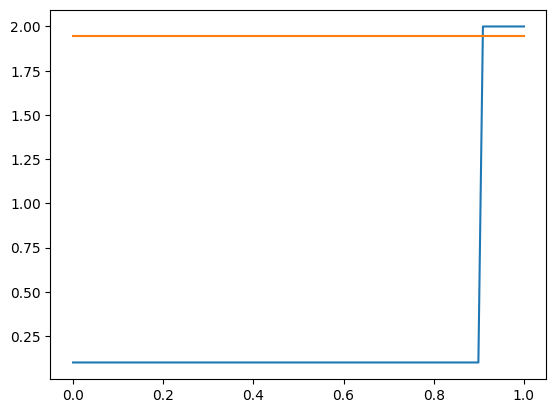

In [12]:
plt.plot(x_grid, U)
plt.plot(x_grid, V)
plt.show()

In [13]:
res = model.integrate([U, V], kinetics, 5)

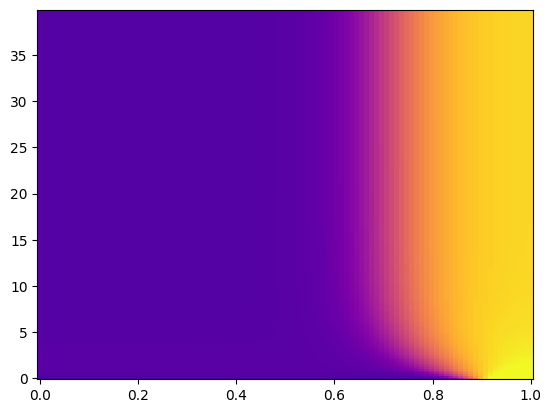

In [14]:
plt.pcolor(x_grid, t_grid, res[:,0,:], vmin=0., vmax=1.2, cmap='plasma')

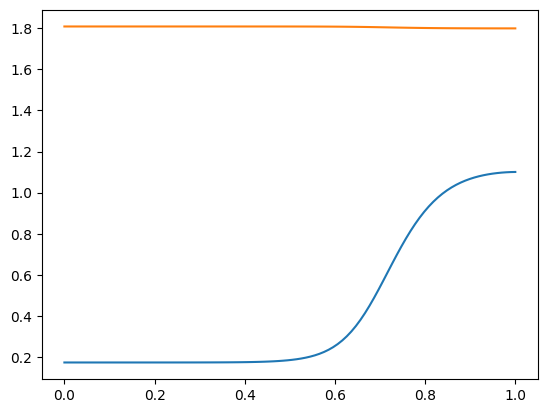

In [15]:
plt.plot(x_grid, res[-1, 0, :])
plt.plot(x_grid, res[-1, 1, :])
plt.show()